<a href="https://colab.research.google.com/github/deutschkihun/KaggleStudy/blob/master/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast cancer 

## Introduction 

- Breast cancer is cancer that forms in the cells of the breasts.

- After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.Substantial support for breast cancer awareness and research funding has helped created advances in the diagnosis and treatment of breast cancer. 

- Breast cancer survival rates have increased, and the number of deaths associated with this disease is steadily declining, largely due to factors such as earlier detection, a new personalized approach to treatment and a better understanding of the disease.

- In this study you'll predict the breast cancer whether they have **benign or malignant** by using factor columns 


[Reference 1](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

[Reference 2](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)


## Source file folder
https://drive.google.com/drive/folders/1xNuupA_A1RCvD21aw7FrxeoC41EnDKHB?usp=sharing

## 1.Libraries

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore") 


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Kaggle/Breast cancer/dataset.csv")

## 2. Data Preprocessing

### 2.1 Remove unnecesary columns


In [0]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
#In this study 'id' and 'Unnamed: 32' are not needed 
#So drop both columns 

### 2.2 Missing values

In [0]:
df.isna().sum().sum()

0

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## 3. Data Visualization 

### 3.1 Univariate visualization



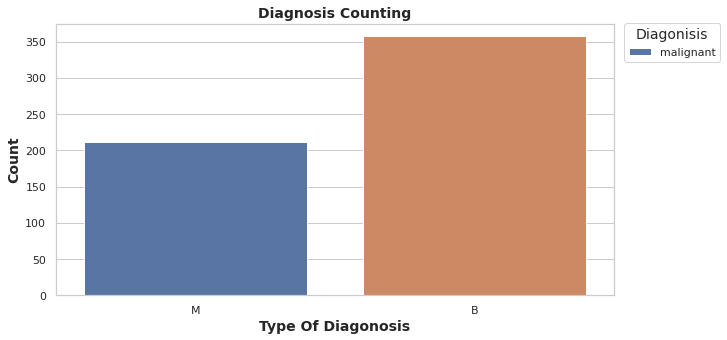

In [0]:
plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='diagnosis');

plt.title('Diagnosis counting'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Type of diagonosis'.title(),
          fontsize=14,weight="bold")

plt.ylabel('Count'.title(),
           fontsize=14,weight="bold")

plt.legend(['malignant','benign'],loc='center right',bbox_to_anchor=(1.2, 0.93), 
           title="Diagonisis", title_fontsize = 14);

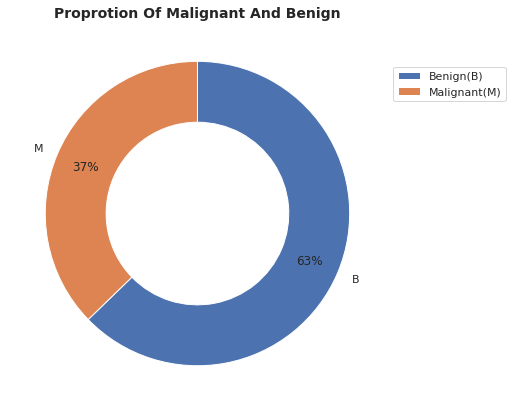

In [0]:
#pie chart  

plt.figure(figsize=(15,7))
sorted_counts = df['diagnosis'].value_counts()
# count the value of diagnosis 
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');


plt.title('Proprotion of malignant and benign'.title(),
         fontsize = 14, weight="bold");

plt.legend(['Benign(B)','Malignant(M)'],bbox_to_anchor=(1,0.9));

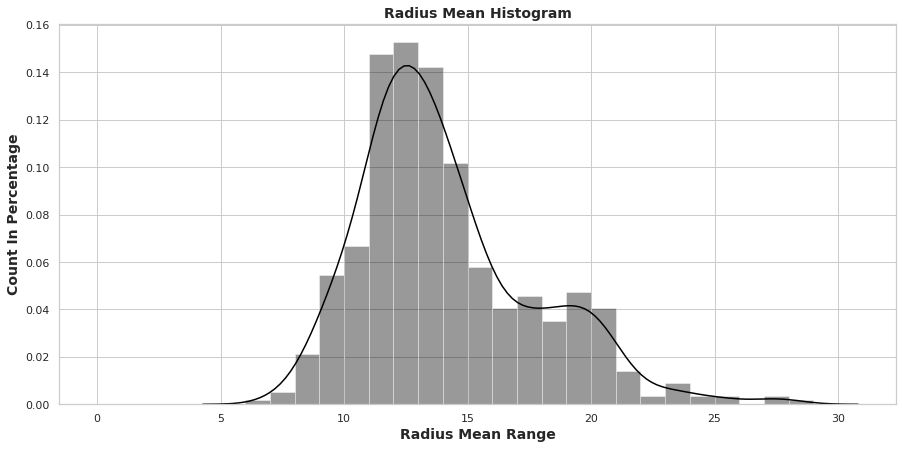

In [0]:
#distplot = histogram + curveline 
# for example : radius mean

plt.subplots(figsize=(15,7))
x = df.radius_mean
bins = np.arange(0,30,1)
sns.distplot(x,bins=bins,color='black')

#ax.set_yticklabels([], minor = True);


plt.title('radius mean Histogram'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('radius mean range'.title(),
          fontsize=14,weight="bold")

plt.ylabel('Count in percentage'.title(),
           fontsize=14,weight="bold");

### 3.2 Bivariate visualization


In [0]:
# split table into different valriables 
y=df.diagnosis 
x = df.iloc[:,1:] 

# standardization
stand = (x - x.mean()) / (x.std())             

> Why we're doing standardization? because columns with `mean`,`se` and `worst` have different size of value.So it's hard to compare with raw data.That's why we're doing standardization to make it comparable.


## $$ z_{score} = \frac {(x- \mu)}{\sigma}$$

###### This is also we called `Standard Scaler` 

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.


- Z = standard score or z score , this score tells us you how many standard deviations from the mean your score is.
- x = observed value
- $\mu$ = mean value of dataset
- $\sigma$ = standard deviation of dataset

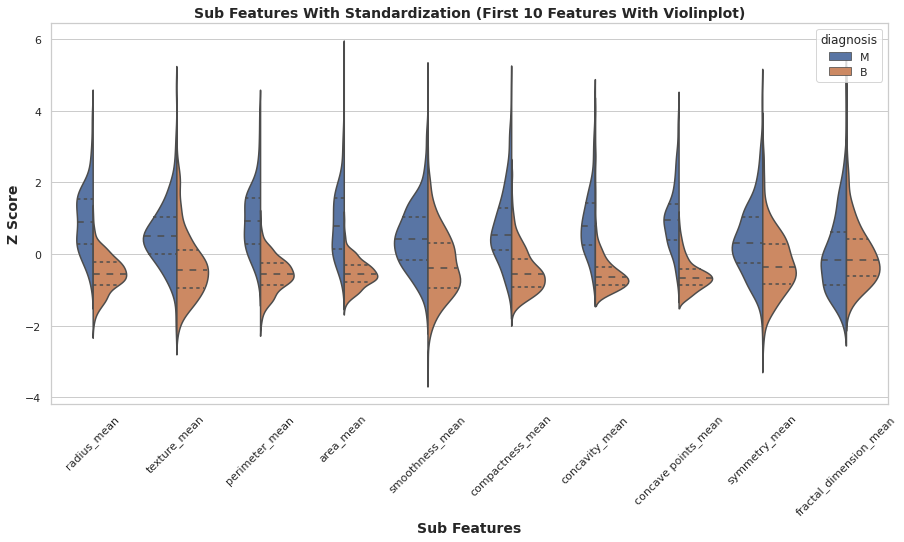

In [0]:
# Because we have 30 sub features we'll divide 3 groups to visualize

data = pd.concat([y,stand.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# In order to visualize different type of numeric value in one graph.We're going to melt df_new table into the new table called `data`.
# id_var : Column(s) to use as identifier variables.
# var_name : Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
# value_name : Name to use for the ‘value’ column. 


plt.figure(figsize=(15,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (first 10 features with violinplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


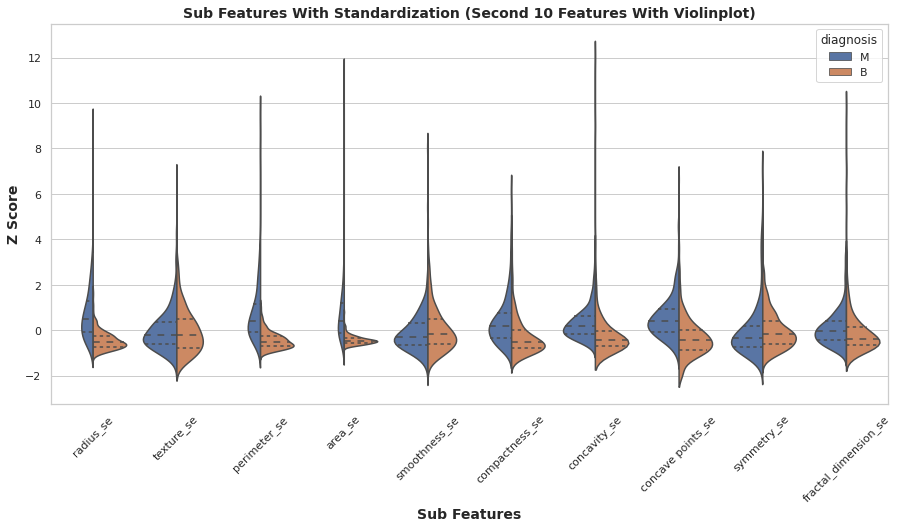

In [0]:
data = pd.concat([y,stand.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# In order to visualize different type of numeric value in one graph.We're going to melt df_new table into the new table called `data`.
# id_var : Column(s) to use as identifier variables.
# var_name : Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
# value_name : Name to use for the ‘value’ column. 


plt.figure(figsize=(15,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (Second 10 features with violinplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");
plt.xticks(rotation=45);


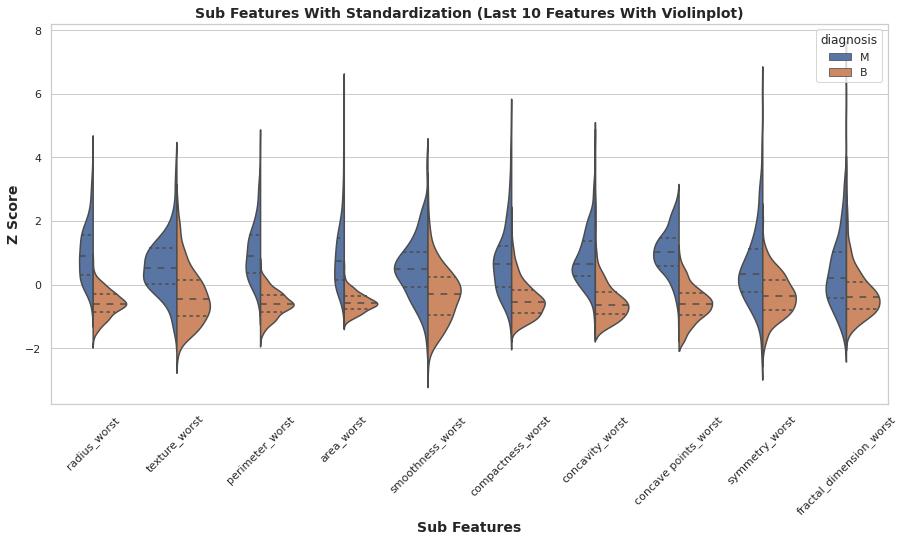

In [0]:
data = pd.concat([y,stand.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# In order to visualize different type of numeric value in one graph.We're going to melt df_new table into the new table called `data`.
# id_var : Column(s) to use as identifier variables.
# var_name : Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
# value_name : Name to use for the ‘value’ column. 


plt.figure(figsize=(15,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (last 10 features with violinplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


#### Observation 

> Violinplot tells us the distribution of z-score with different type of tumors

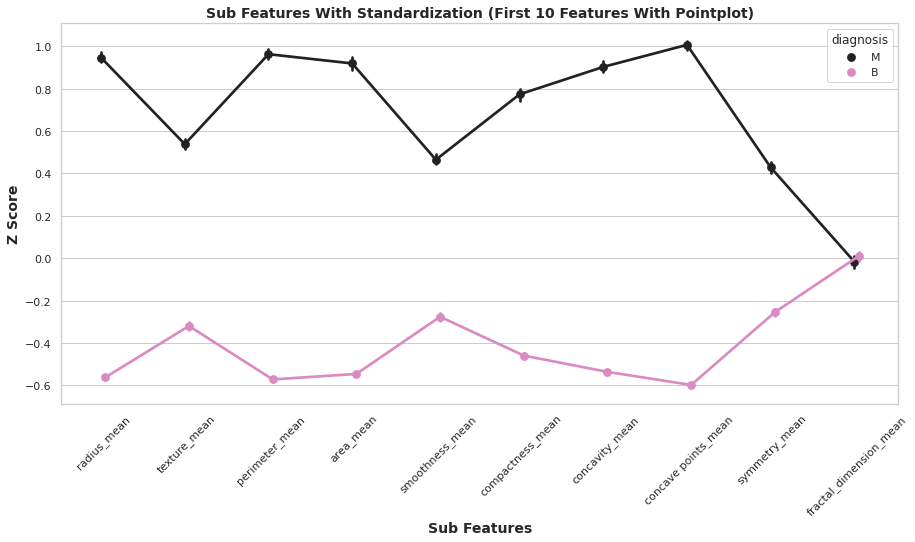

In [0]:
data = pd.concat([y,stand.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[6]
sns.pointplot(data=data,x='features',y='value',hue='diagnosis',dodge=True,ci=30,
              color=base_color)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.


plt.title('Sub features with standardization (first 10 features with pointplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


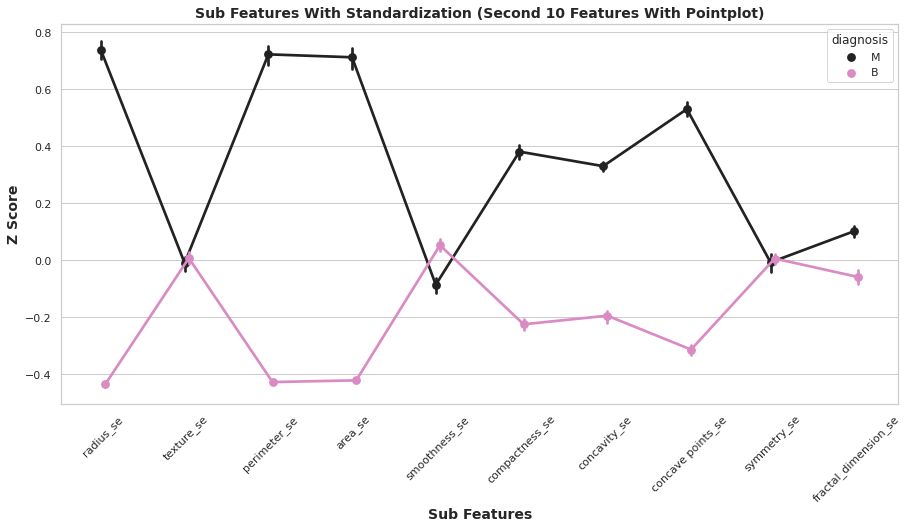

In [0]:
data = pd.concat([y,stand.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[6]
sns.pointplot(data=data,x='features',y='value',hue='diagnosis',dodge=True,ci=30,
              color=base_color)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.


plt.title('Sub features with standardization (Second 10 features with pointplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


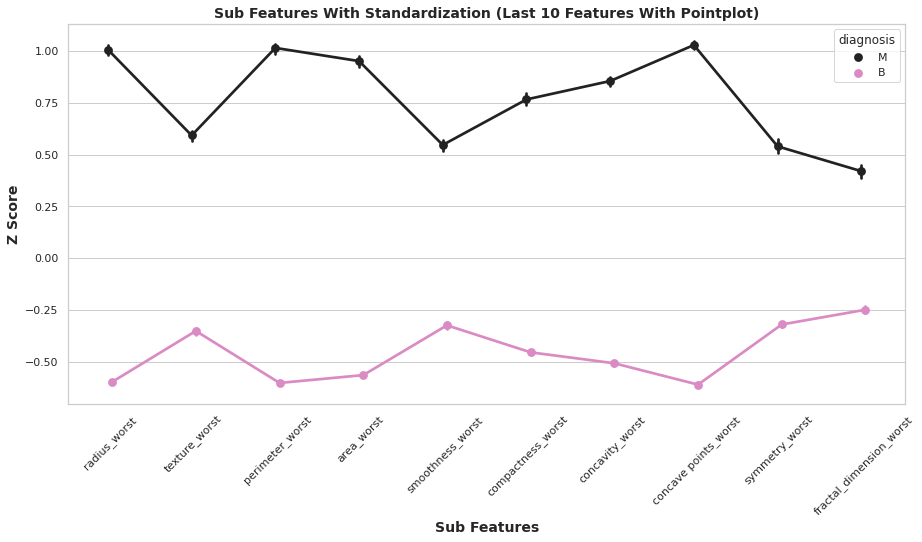

In [0]:
data = pd.concat([y,stand.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.subplots(figsize=(15,7))
base_color = sns.color_palette()[6]
sns.pointplot(data=data,x='features',y='value',hue='diagnosis',dodge=True,ci=30,
              color=base_color)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.


plt.title('Sub features with standardization (last 10 features with pointplot)'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=14,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=14,weight="bold");

plt.xticks(rotation=45);


### 3.3 Multivariate vlsualization

In [0]:
data_new = pd.concat([y,stand],axis=1)
# build a new dataset with y and stand
# if you forgot what y and stand are. Just look at below 

# y=df.diagnosis 
# x = df.iloc[:,1:]  and stand = (x - x.mean()) / (x.std())          

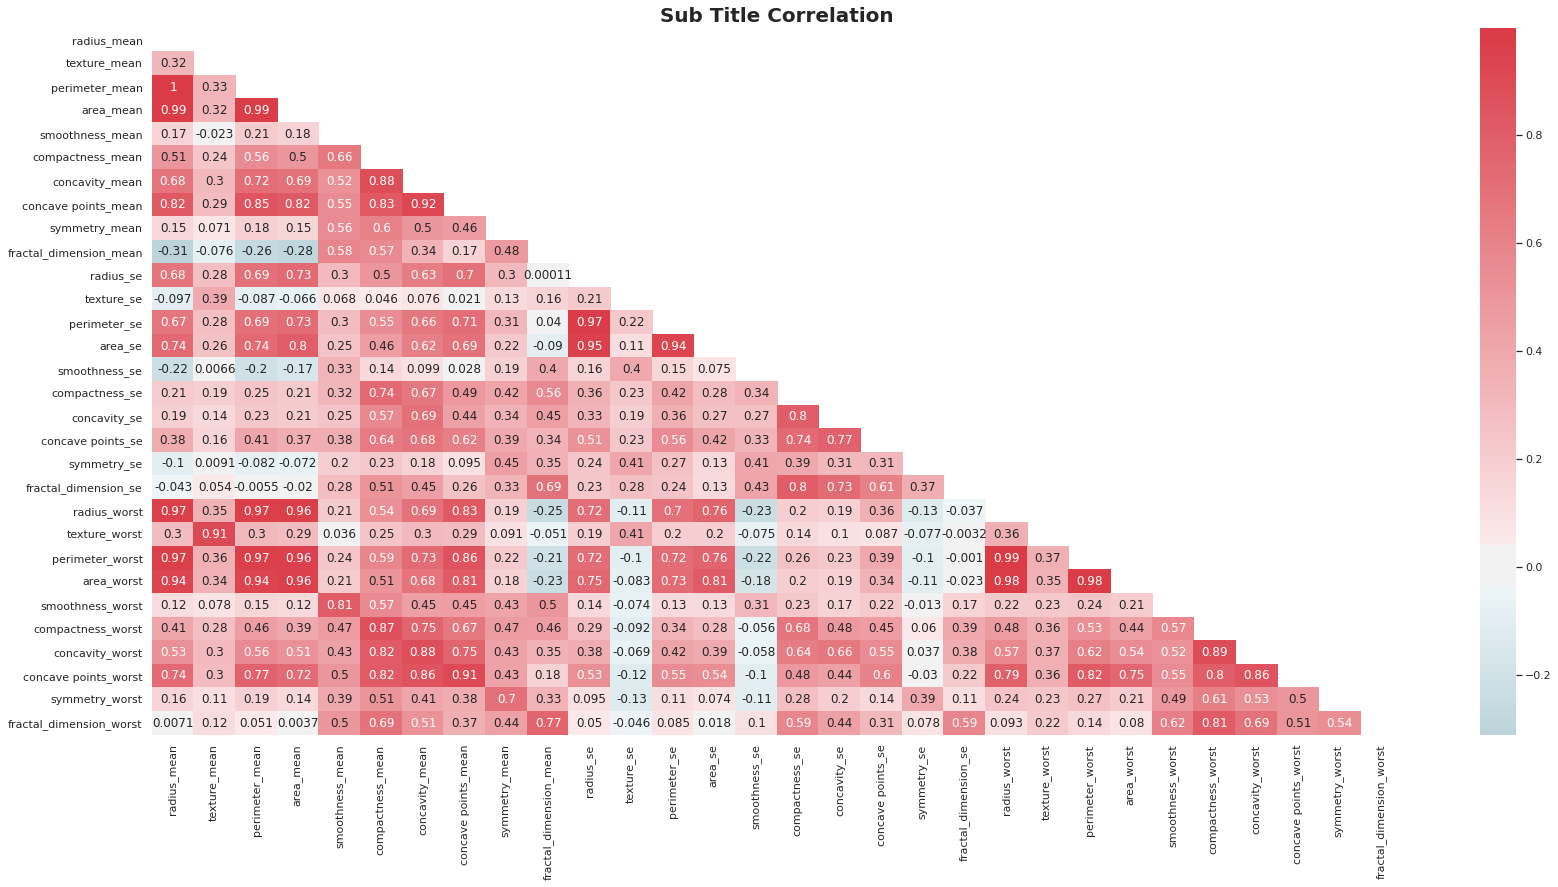

In [0]:
# scatterplot with 2 high related sub features. Addtionally diagnosis will be used as a hue of different type of tumors
# Before we're going to plot scatter we'll find out which sub features are related together strongly 
# For that we will use pearson corrla

plt.figure(figsize=(28,13))
c= data_new.corr()
mask = np.triu(np.ones_like(c, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
# color choose
sns.heatmap(c,cmap=cmap,mask=mask,center=0,annot=True);


plt.title('Sub title correlation'.title(),
         fontsize=20,weight='bold');

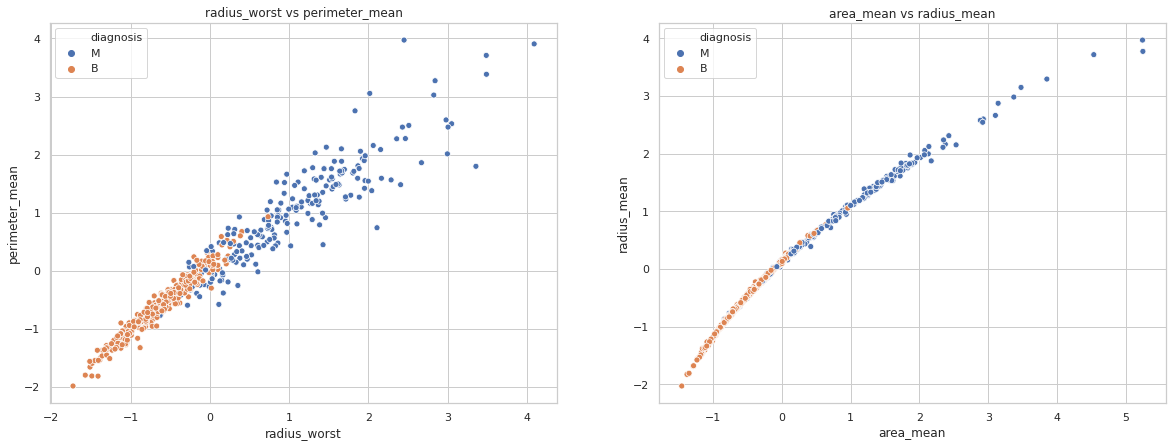

In [0]:
f,ax = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(data=data_new,x='radius_worst',y='perimeter_mean',hue='diagnosis',x_jitter=0.04,ax=ax[0])
ax[0].set_title('radius_worst vs perimeter_mean')
sns.scatterplot(data=data_new,x='area_mean',y='radius_mean',hue='diagnosis',x_jitter=0.04,ax=ax[1])
ax[1].set_title('area_mean vs radius_mean');

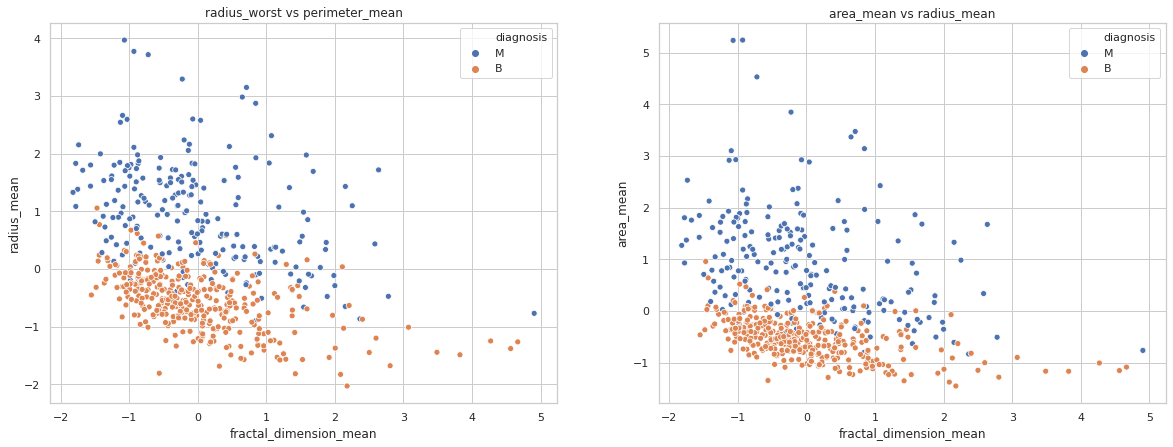

In [0]:
f,ax = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(data=data_new,x='fractal_dimension_mean',y='radius_mean',hue='diagnosis',x_jitter=0.04,ax=ax[0])
ax[0].set_title('radius_worst vs perimeter_mean')
sns.scatterplot(data=data_new,x='fractal_dimension_mean',y='area_mean',hue='diagnosis',x_jitter=0.04,ax=ax[1])
ax[1].set_title('area_mean vs radius_mean');

## 4. Prediction 


- Random Forest
- DecisionTree
- LogisticRegression

will be used for the prediction 

### 4.1 Split Train and Test

In [0]:
train,test = train_test_split(df,test_size=0.2,random_state=2019)

# test size =0.2 means I will use 20% for testing and 80% for training 
# Spliting test-set and training-set is very important.Because we have to use testdata to examine our prediction model and get a performance in numeric value.
# So never use testdata for training.Otherwise we can't get a exact result of prediction model.
# Reason why we use random_state : https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

x_train = train.drop(['diagnosis'],axis=1)
y_train = train.diagnosis

# we should think about why we drop diagonosis column.Because we want to know the diagnosis in the end (That mean malignant or benign)
# We're going to use other columns as a x variable to get a diagonosis(y variable).That's the reason why we drop diagnosis in x_train and x_test

x_test = test.drop(['diagnosis'],axis=1)
y_test = test.diagnosis 

print(len(train),len(test))

455 114


###  4.1 DecisionTreeClassifier

In [0]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('Decision Tree: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100)+'%')


Decision Tree: 90.35%


### 4.2 LogisticRegression

In [0]:
model = LogisticRegression(solver='lbfgs',max_iter=2000)
# about parameters: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('LogisticRegression: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100)+'%')


LogisticRegression: 94.74%


### 4.3 RandomForestClassifier

In [0]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('Random Forest: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100)+'%')


Random Forest: 92.98%


### 4.4 Compute Feature Importances

In [0]:
features = pd.Series(
     model.feature_importances_,
    index=x_train.columns).sort_values(ascending=False)

# model.feature_importances_ shows which paramet is important to predict the model 
# we are matching train dataset columns with model.feature_importances and saved in pandas series as a numeric values 
print(features)

concave points_worst       0.160567
radius_worst               0.136661
perimeter_worst            0.107497
area_worst                 0.096034
concavity_mean             0.085010
concave points_mean        0.080908
perimeter_mean             0.047124
area_se                    0.046186
area_mean                  0.039052
concavity_worst            0.029802
compactness_worst          0.020415
radius_mean                0.018525
radius_se                  0.015578
smoothness_worst           0.014554
texture_mean               0.012362
symmetry_worst             0.010578
texture_worst              0.010117
compactness_mean           0.009287
perimeter_se               0.009247
compactness_se             0.006416
fractal_dimension_worst    0.006264
smoothness_mean            0.006105
symmetry_se                0.004824
concave points_se          0.004799
smoothness_se              0.004655
fractal_dimension_se       0.004090
texture_se                 0.003973
fractal_dimension_mean     0

In [0]:
### Extract Top 5 Features
top_5_features = features.keys()[:5]
# series.keys() : this function is an alias for index. It returns the index labels of the given series object.

print(top_5_features)

Index(['concave points_worst', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_mean'],
      dtype='object')


### 4.5 Test all Models with Top5 features

In [0]:
model = {
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5,random_state=2019)

for name, model in model.items():
    scores = cross_val_score(model,df[top_5_features],df.diagnosis,cv=cv)
    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))



DecisionTreeClassifier:90.68%
LogisticRegression:90.86%
RandomForestClassifier:93.50%


### 4.6 Normalization

- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Normalization rescales the values into a range of **[0,1]**.


## $$ X_{normalization} = \frac {x- x_{min}}{x_{max}-x_{min}}$$


#### **But people can ask a question again : Why do we need scaling?**
 
- Machine learning algorithm just sees number.That means if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. 

- So these more significant number starts playing a more decisive role while training the model.The machine learning algorithm works on numbers and does not know what that number represents.0

- For example, a weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.


#### **Some examples of algorithms where feature scaling matters are:**
- **KNN** with a Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.

-  **K-Means** uses the Euclidean distance measure here feature scaling matters.

- **PCA** tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features.

#### **Standardization vs  Normalization ?**



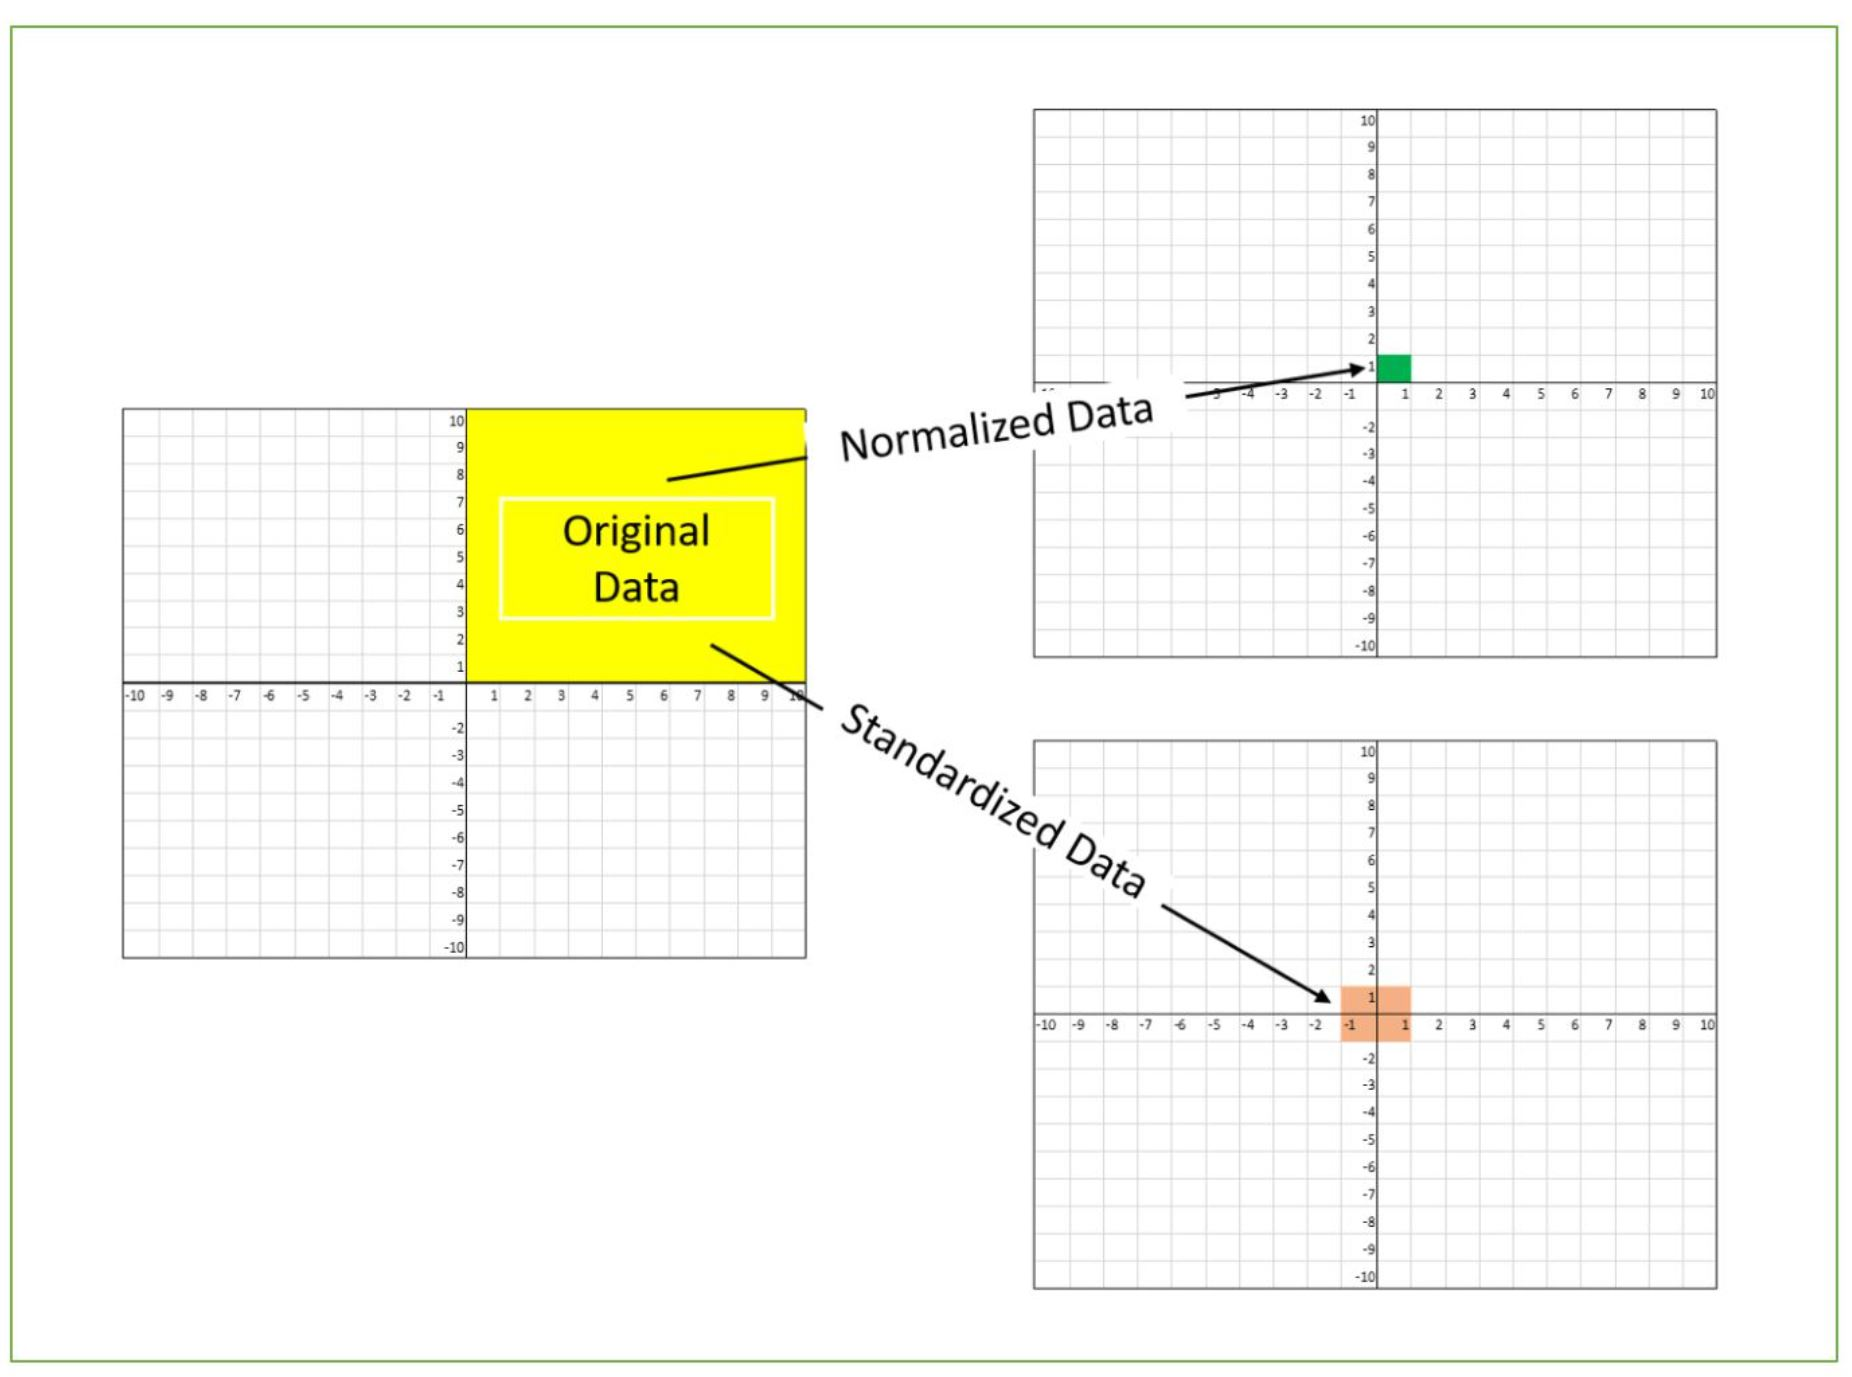

In [0]:
Image('/content/drive/My Drive/Colab Notebooks/Kaggle/Breast cancer/relationship.JPG')

In [0]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler is normalization libarary

scaler = MinMaxScaler(feature_range=(0,1))
# scale the range between 0 and 1 
scaled_data = scaler.fit_transform(df[top_5_features])

model = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    
}

cv = KFold(n_splits=5,random_state=2019)

for name, model in model.items():
    scores = cross_val_score(model,scaled_data,df.diagnosis,cv=cv)
    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))

SVM:94.38%
DecisionTreeClassifier:91.39%
KNeighborsClassifier:94.21%
LogisticRegression:94.03%
RandomForestClassifier:92.80%


### 4.7 Filtering features mean 

In [0]:
# First we will have a new table which contains only feature mean 
features_mean = list(df.columns[1:11])

# And then change diagnosis name
df['diagnosis']=df['diagnosis'].map({'M':0,'B':1})

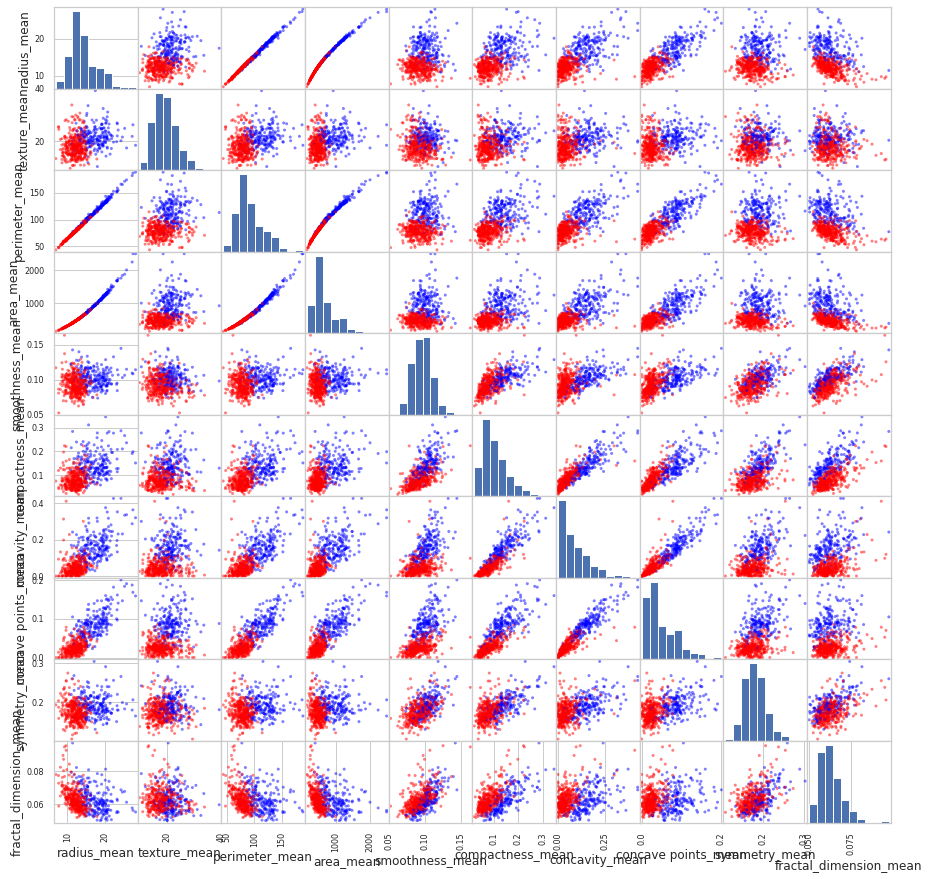

In [0]:
from pandas.plotting import scatter_matrix

color_function = {0: "blue", 1: "red"} 
colors = df["diagnosis"].map(lambda x: color_function.get(x))
# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(df[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); 
# plotting scatter plot matrix

In [0]:
df_new = pd.DataFrame(df,columns=['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concavity_mean'] )
train,test = train_test_split(df_new,test_size=0.2,random_state=2019)

x_train = train.drop(['diagnosis'],axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'],axis=1)
y_test = test.diagnosis 


In [0]:
model = {
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)    
}

cv = KFold(n_splits=5,random_state=2019)

prediction_var=['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concavity_mean']
df_new[prediction_var]

for name, model in model.items():
    scores = cross_val_score(model,df_new[prediction_var],df_new.diagnosis,cv=cv)    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))


DecisionTreeClassifier:88.93%
LogisticRegression:89.64%
RandomForestClassifier:91.22%
